<a href="https://colab.research.google.com/github/pacorod1998/Banking-Customer-Loyalty-Analysis-Modeling/blob/main/Banking_Customer_Loyalty_analysis_%26_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Background**



*   Despite banks' continuous efforts to attract and retain customers, the banking industry faces a persistent challenge in the form of customer turnover, leading to financial losses and reduced customer satisfaction.
*   It is advantageous for banks to identify the factors influencing a customer's decision to depart from the institution.


##**Objetives**



*   The objective of this project is to examine the rate of customer turnover within the bank, as it is essential to comprehend the reasons behind customer departures.
*   Following the analysis, it is imperative to develop a Machine Learning Model capable of identifying the pivotal factors that greatly impact customer turnover or attrition.
*   In the end will choose the most reliable model that will attach a probability to the churn to make it easier for customer service to target right customer in order to minimize their efforts to prevent customers churn.






##**Mounting Google Drive**



In [ ]:
# Mount google drive

from google.colab import drive
drive.mount('/content/gdrive/',force_remount=True)

Mounted at /content/gdrive/


In [ ]:
# Right click on the BANA6350>Data folder and copy the folder path by click "Copy Path". Then paste that inside the code below to link your folder where all the data will reside

import os

path = "/content/gdrive/MyDrive/BANA6350/Data"

os.chdir(path)

# the above code will change your current working directory to the path i.e., BANA6350/Data folder

In [ ]:
# Let's try opening a file inside our Current working directory:

import pandas as pd
pd.read_csv('Churn_Modelling.csv').head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


##**Setting up formatting**

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams['lines.linewidth'] = 3
plt.rcParams['figure.figsize'] = [14.0, 6.0]
plt.rcParams['font.size']= 18
plt.style.available   # Check what styles are available for Chart formats by visiting : https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
plt.style.use('fivethirtyeight')       # Assigning the FiveThirtyEight format, you can choose any of the names from the above link

In [ ]:
# if for some reason your sns plots are not visible, run this line of code in Colab

%matplotlib inline

##**Importing Commonly used python packages:**

In [ ]:
!pip install prince

In [ ]:
!pip install plotly

In [ ]:
!pip install yellowbrick


In [ ]:
import math
from pathlib import Path
import pandas as pd
import numpy as np

from scipy import stats
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.stats import multivariate_normal


import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import from_levels_and_colors
import seaborn as sns

from statsmodels.stats import power
import prince

import plotly.express as px

##**Loading Dataset**

In [ ]:
df = pd.read_csv('Churn_Modelling.csv')


In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


##**Basic Understanding of Data**

In [ ]:
print("Total number of records/rows present in the dataset is:",df.shape[0])
print("Total number of attributes/columns present in the dataset is:",df.shape[1])

Total number of records/rows present in the dataset is: 10000
Total number of attributes/columns present in the dataset is: 14


In [ ]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

### **Inference:**



*   **RowNumber:** It is likely a unique identifier for each record and does not contribute directly to the analysis.
*   **CustomerId:** It can be used to track and differentiate individual customers within the dataset.
*   **Surname:** It provides information about the family name of each customer.
*   **CreditScore:** It is a numerical value that assesses the creditworthiness of an individual based on their credit history and financial behavior.
*   **Geography:** It provides information about the customers' geographic distribution, allowing for analysis based on regional or national factors.
*  **Gender:** It categorizes customers as either male or female, enabling gender-based analysis if relevant to the churn prediction.
*  **Age:** It represents the customer's age in years and can be used to analyze age-related patterns and behaviors.
*  **Tenure:** It typically represents the number of years or months the customer has been associated with the bank.
*  **Balance:** It reflects the amount of money in the customer's bank account at a specific point in time.
*  **NumOfProducts:** It can include various offerings such as savings accounts, loans, credit cards, etc.
*  **HasCrCard:** It is a binary variable with a value of 1 if the customer possesses a credit card and 0 otherwise.
*  **IsActiveMember:** It is a binary variable indicating whether the customer is an active member (1) or not (0) within the bank.
*  **EstimatedSalary:** It provides an approximation of the customer's income level, which can be relevant for analyzing churn behavior.
*  **Exited:** It indicates whether a customer has churned (1) or not (0) from the bank. It is the variable we aim to predict using the other features.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})

,Total No. of Missing Values
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [ ]:
df[df.duplicated()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [ ]:
df.describe(include="object").T

,count,unique,top,freq
Surname,10000,2932,Smith,32
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


##**Data Munging**

In [ ]:
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4242,4243,15746553,Castles,526,Germany,Male,50,5,124233.24,1,0,1,159456.87,1
4781,4782,15804131,Farmer,850,Spain,Female,53,7,65407.16,2,0,0,182633.63,1
8000,8001,15629002,Hamilton,747,Germany,Male,36,8,102603.30,2,1,1,180693.61,0
1546,1547,15727944,Simpkinson,701,Germany,Female,48,1,92072.68,1,1,1,133992.36,0
5707,5708,15649451,Yates,746,France,Male,25,9,0.00,2,0,1,88728.47,0


In [ ]:
df.drop(columns=["RowNumber","CustomerId","Surname"],inplace=True)

In [ ]:
df.rename(columns={"Exited":"Churned"},inplace=True)

In [ ]:
df["Churned"].replace({0:"No",1:"Yes"},inplace=True)

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,Yes
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,No
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,Yes
3,699,France,Female,39,1,0.00,2,0,0,93826.63,No
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,No


##**Explorator Data Analysis**

<ipython-input-23-a917187b99e8>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=count.index, y=count.values, palette="pastel")


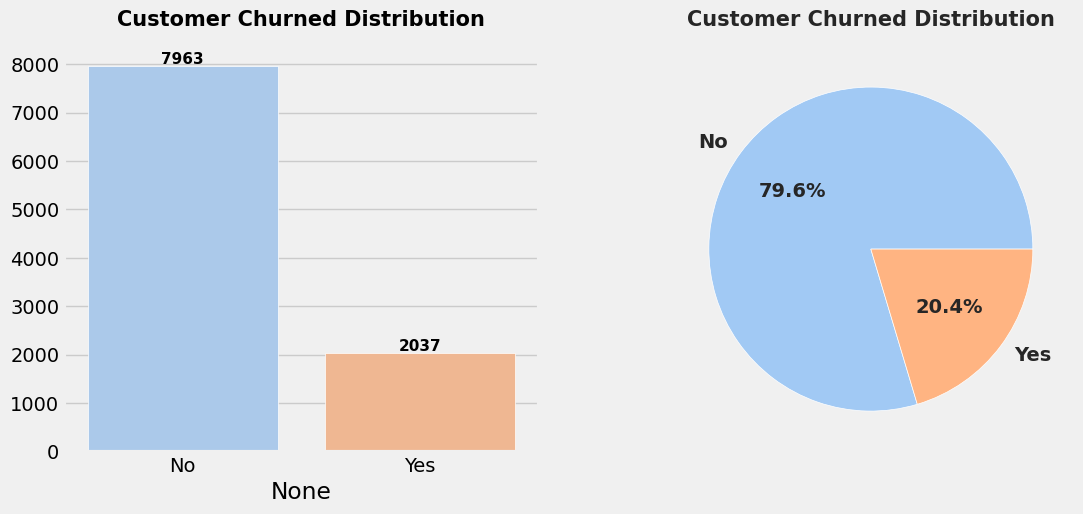

In [ ]:
import seaborn as sns

count = df["Churned"].value_counts()

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.set_style("whitegrid")
ax = sns.barplot(x=count.index, y=count.values, palette="pastel")

# Annotate bars with counts
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points', fontweight='bold')

plt.title("Customer Churned Distribution", fontweight="bold", size=15, pad=15)

plt.subplot(1, 2, 2)
plt.pie(count.values, labels=count.index, autopct="%1.1f%%", colors=sns.color_palette("pastel"),
        textprops={"fontweight": "bold"})
plt.title("Customer Churned Distribution", fontweight="bold", size=15, pad=15)

plt.show()


In [ ]:
def countplot(column):
    plt.figure(figsize=(10, 5))
    custom_palette = {"Yes": sns.color_palette("pastel")[1], "No": sns.color_palette("pastel")[0]}
    ax = sns.countplot(x=column, data=df, hue="Churned", palette=custom_palette)
    total_count = len(df[column])
    for value in ax.patches:
        percentage = 100 * value.get_height() / total_count
        if percentage >= 1:  # Exclude annotation if percentage is less than 1%
            percentage_str = "{:.1f}%".format(percentage)
            x = value.get_x() + value.get_width() / 2 - 0.05
            y = value.get_y() + value.get_height()
            ax.annotate(percentage_str, (x, y), fontweight="bold", size=11, color='black', xytext=(0, 5),
                        textcoords='offset points')
    plt.title(f"Customer Churned by {column}", fontweight="bold", size=15, pad=15)
    plt.show()



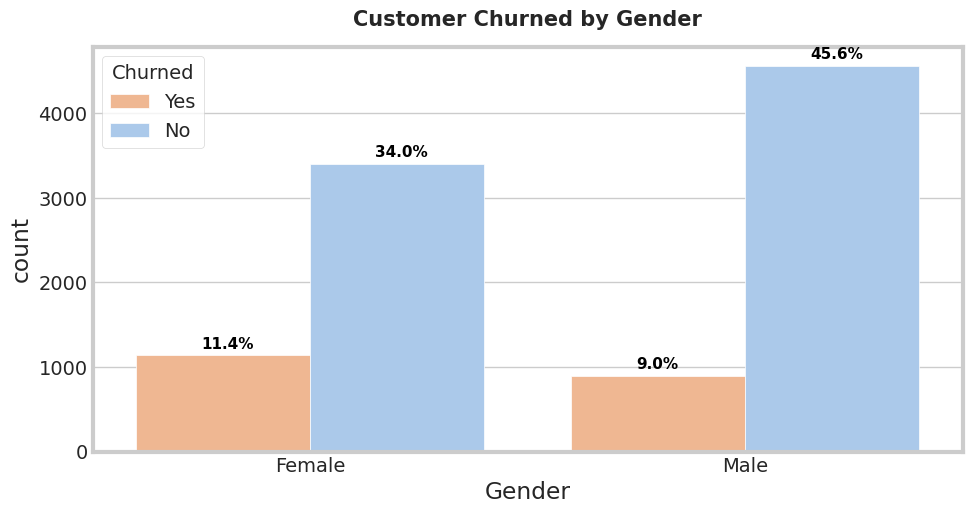

In [ ]:
countplot("Gender")

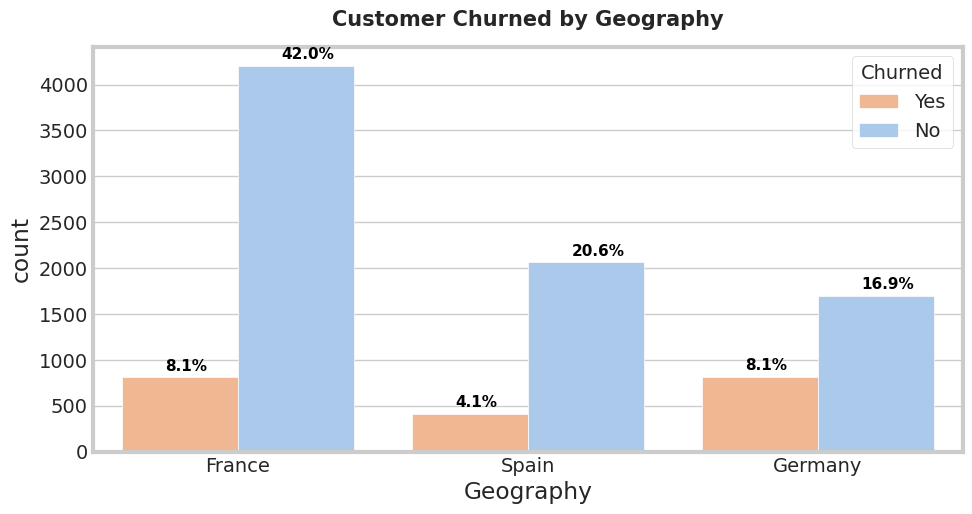

In [ ]:
countplot("Geography")

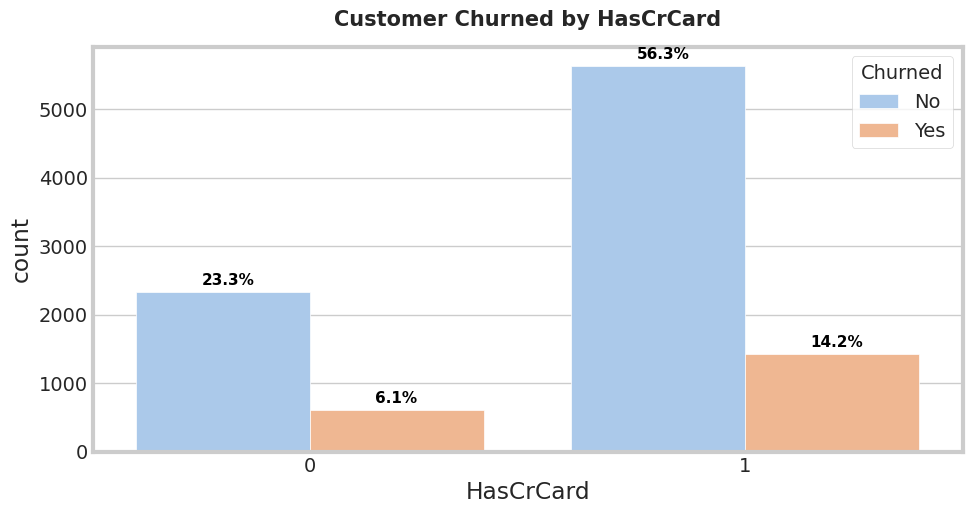

In [ ]:
countplot("HasCrCard")

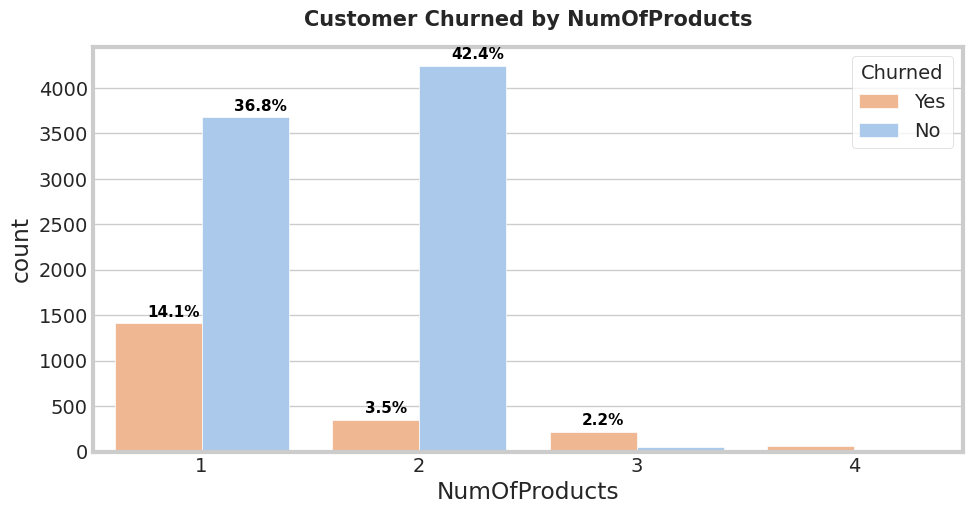

In [ ]:
countplot("NumOfProducts")

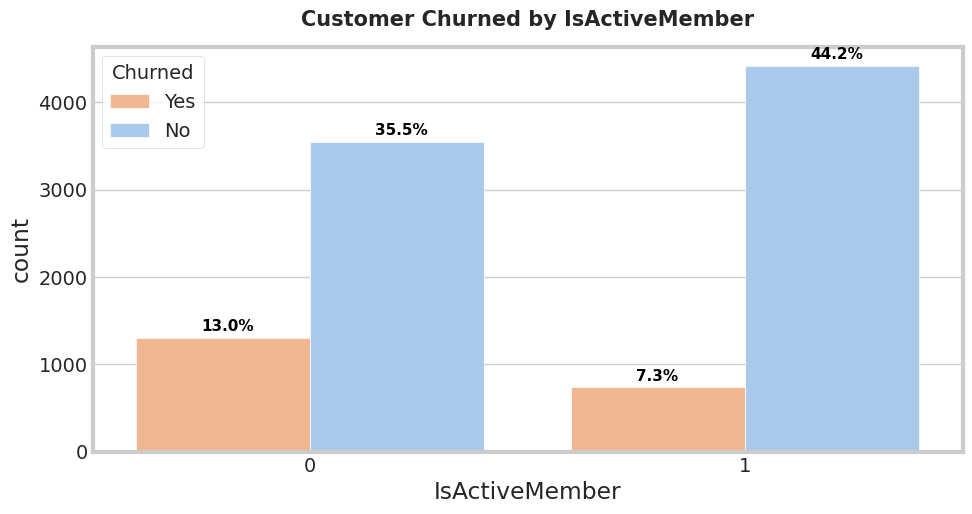

In [ ]:
countplot("IsActiveMember")

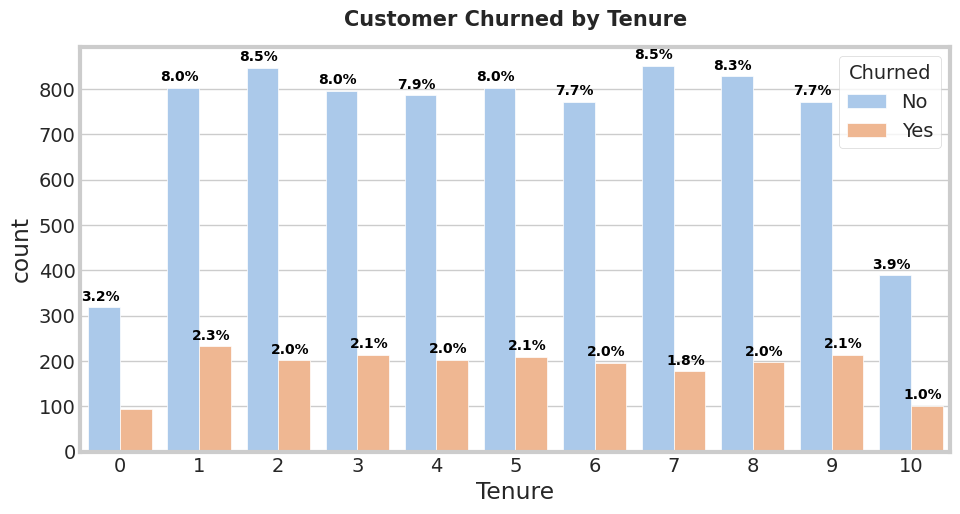

In [ ]:
def countplot(column):
    plt.figure(figsize=(10, 5))
    ax = sns.countplot(x=column, data=df, hue="Churned", palette="pastel")
    total_count = len(df[column])
    for value in ax.patches:
        percentage = 100 * value.get_height() / total_count
        if percentage >= 1:  # Exclude annotation if percentage is less than 1%
            percentage_str = "{:.1f}%".format(percentage)
            x = value.get_x() + value.get_width() / 2 - 0.05
            y = value.get_y() + value.get_height()
            ax.annotate(percentage_str, (x, y), fontweight="bold", size=10, color='black', ha="center",
                        xytext=(0, 5), textcoords='offset points')
    plt.title(f"Customer Churned by {column}", fontweight="bold", size=15, pad=15)
    plt.show()

# Example usage
countplot("Tenure")


In [ ]:
def continous_plot(column):
    plt.figure(figsize=(13, 6))

    # Define a custom palette with colors swapped for "Yes" and "No"
    custom_palette = {"Yes": sns.color_palette("pastel")[1], "No": sns.color_palette("pastel")[0]}

    plt.subplot(1, 2, 1)
    sns.histplot(x=column, hue="Churned", data=df, kde=True, palette=custom_palette)
    plt.title(f"Distribution of {column} by Churn Status", fontweight="bold", pad=15, size=14)

    plt.subplot(1, 2, 2)
    sns.boxplot(x="Churned", y=column, data=df, palette=custom_palette)  # Using custom palette
    plt.title(f"Distribution of {column} by Churn Status", fontweight="bold", pad=15, size=15)

    plt.tight_layout()
    plt.show()


<ipython-input-31-9e51ee5aab9e>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churned", y=column, data=df, palette=custom_palette)  # Using custom palette


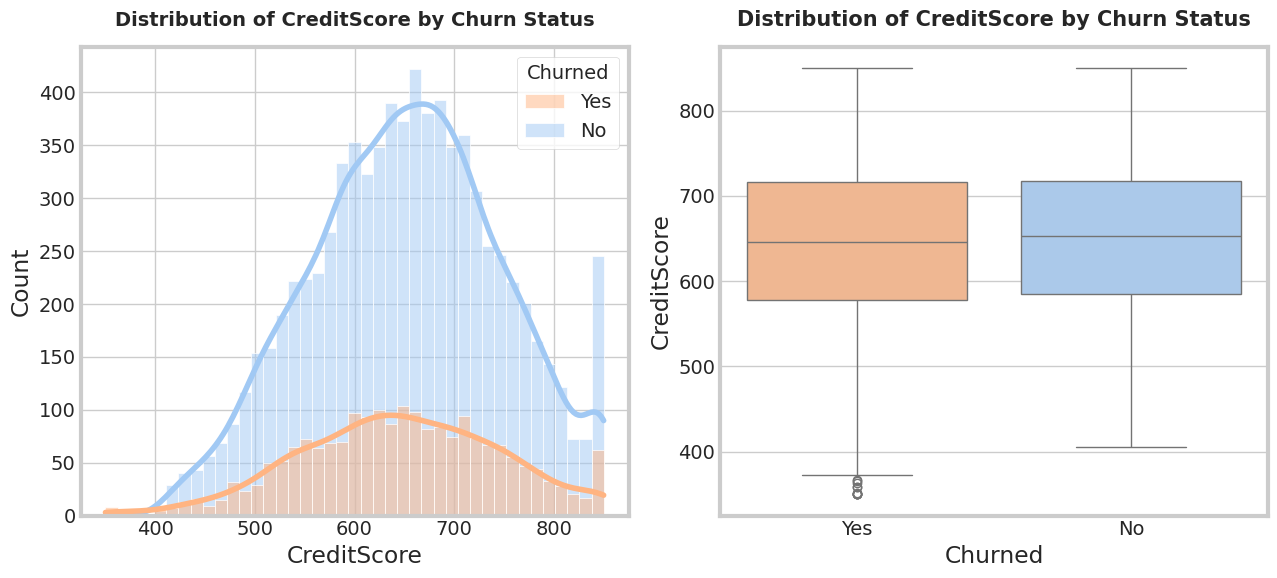

In [ ]:
continous_plot("CreditScore")

<ipython-input-31-9e51ee5aab9e>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churned", y=column, data=df, palette=custom_palette)  # Using custom palette


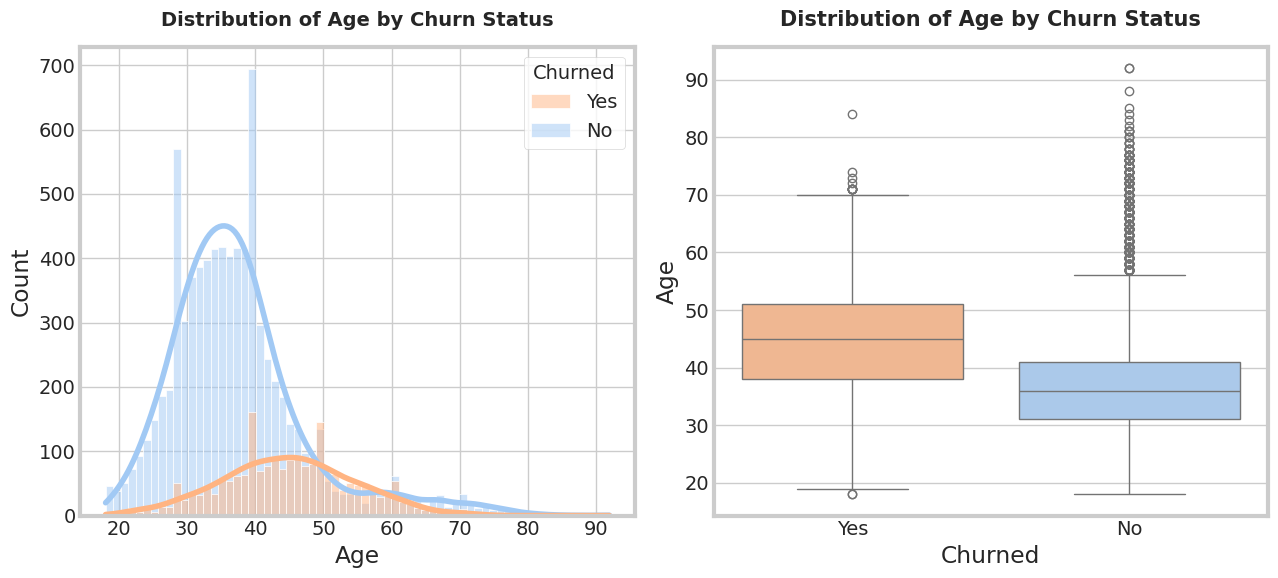

In [ ]:
continous_plot("Age")

<ipython-input-31-9e51ee5aab9e>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churned", y=column, data=df, palette=custom_palette)  # Using custom palette


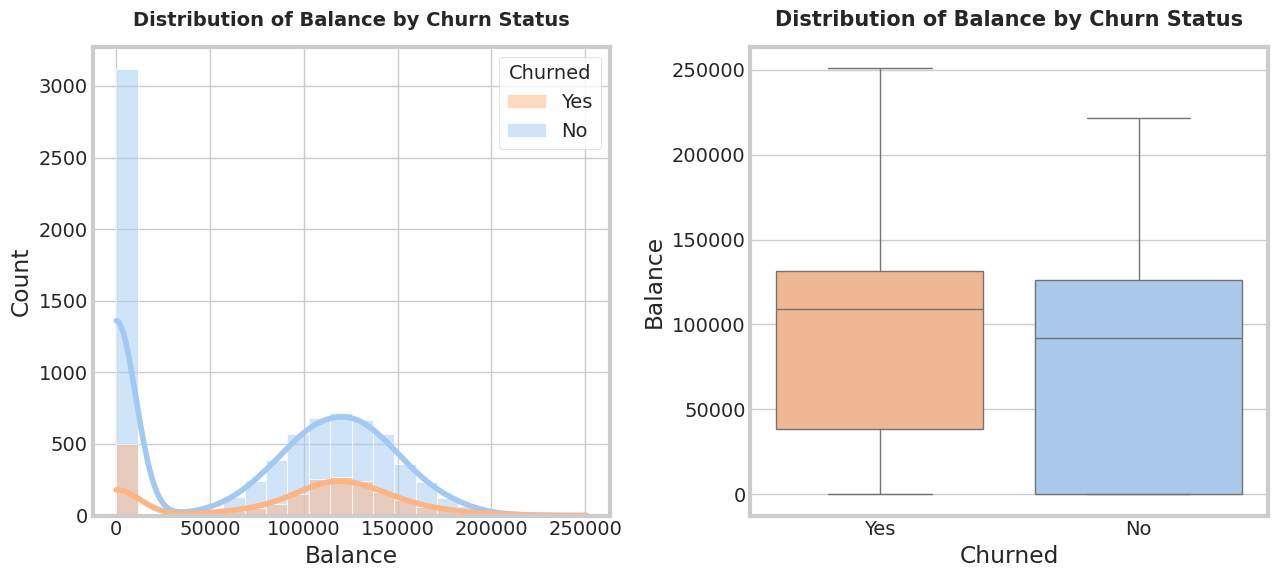

In [ ]:
continous_plot("Balance")


<ipython-input-31-9e51ee5aab9e>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churned", y=column, data=df, palette=custom_palette)  # Using custom palette


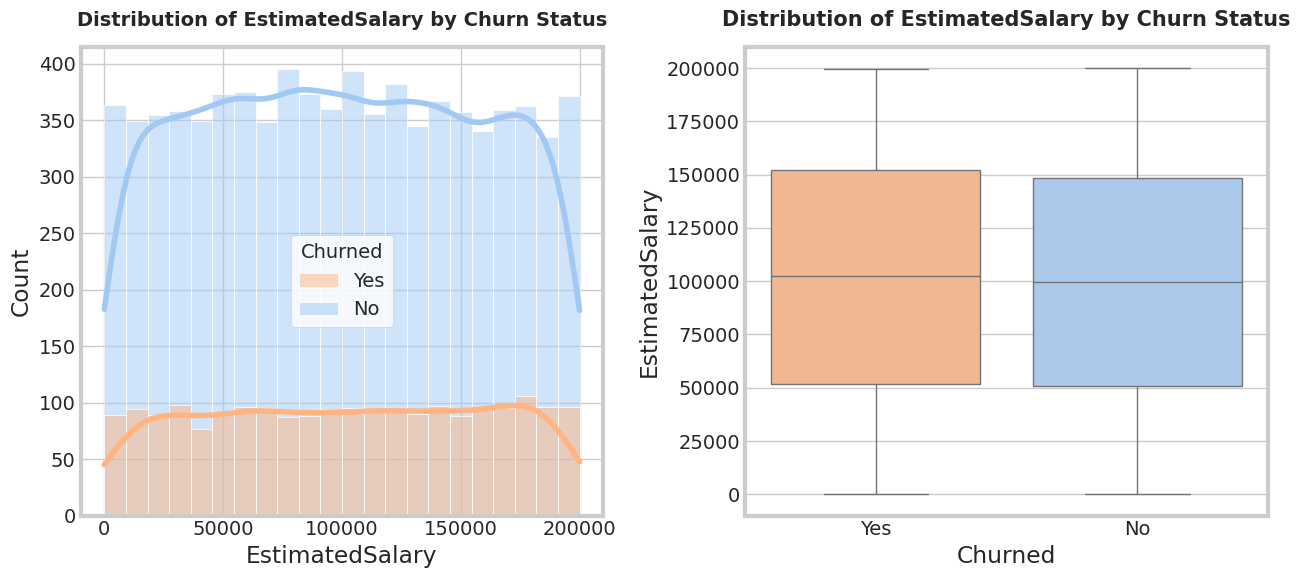

In [ ]:
continous_plot("EstimatedSalary")

##**Feature Engineering**

In [ ]:
conditions = [(df["NumOfProducts"]==1), (df["NumOfProducts"]==2), (df["NumOfProducts"]>2)]
values =     ["One product","Two Products","More Than 2 Products"]

In [ ]:
df["Total_Products"] = np.select(conditions,values)

In [ ]:
df.drop(columns="NumOfProducts", inplace=True)

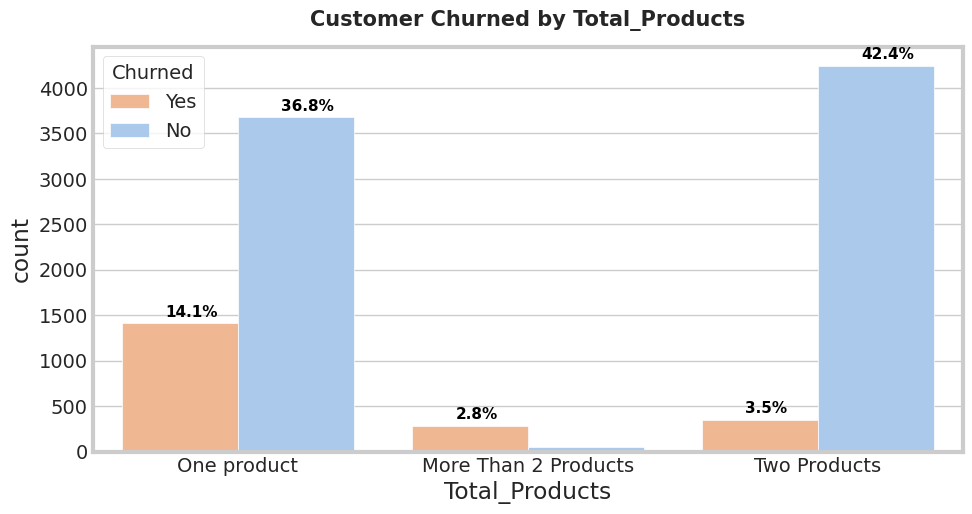

In [ ]:
def countplot(column):
    plt.figure(figsize=(10, 5))
    custom_palette = {"Yes": sns.color_palette("pastel")[1], "No": sns.color_palette("pastel")[0]}
    ax = sns.countplot(x=column, data=df, hue="Churned", palette=custom_palette)
    total_count = len(df[column])
    for value in ax.patches:
        percentage = 100 * value.get_height() / total_count
        if percentage >= 1:  # Exclude annotation if percentage is less than 1%
            percentage_str = "{:.1f}%".format(percentage)
            x = value.get_x() + value.get_width() / 2 - 0.05
            y = value.get_y() + value.get_height()
            ax.annotate(percentage_str, (x, y), fontweight="bold", size=11, color='black', xytext=(0, 5),
                        textcoords='offset points')
    plt.title(f"Customer Churned by {column}", fontweight="bold", size=15, pad=15)
    plt.show()


countplot("Total_Products")

In [ ]:
conditions = [(df["Balance"]==0), (df["Balance"]>0)]
values = ["Zero Balance","More Than zero Balance"]

In [ ]:
df["Account_Balance"] = np.select(conditions, values)

In [ ]:
df.drop(columns="Balance",inplace=True)

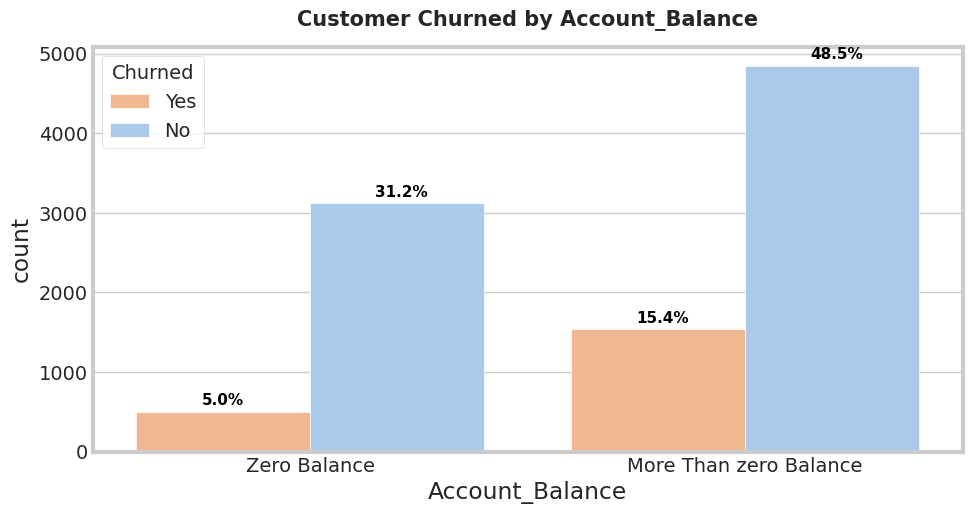

In [ ]:
countplot("Account_Balance")

##**Data Preprocessing**

In [ ]:
cat_cols = ["Geography","Gender","Total_Products","Account_Balance"]

for column in cat_cols:
    print(f"Unique Values in {column} column is:",df[column].unique())
    print("-"*100,"\n")

Unique Values in Geography column is: ['France' 'Spain' 'Germany']
---------------------------------------------------------------------------------------------------- 

Unique Values in Gender column is: ['Female' 'Male']
---------------------------------------------------------------------------------------------------- 

Unique Values in Total_Products column is: ['One product' 'More Than 2 Products' 'Two Products']
---------------------------------------------------------------------------------------------------- 

Unique Values in Account_Balance column is: ['Zero Balance' 'More Than zero Balance']
---------------------------------------------------------------------------------------------------- 



In [ ]:
df = pd.get_dummies(columns=cat_cols, data=df)

In [ ]:
df["Churned"].replace({"No":0,"Yes":1},inplace=True)

In [ ]:
df.head()

,CreditScore,Age,Tenure,HasCrCard,IsActiveMember,EstimatedSalary,Churned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Total_Products_More Than 2 Products,Total_Products_One product,Total_Products_Two Products,Account_Balance_More Than zero Balance,Account_Balance_Zero Balance
0,619,42,2,1,1,101348.88,1,1,0,0,1,0,0,1,0,0,1
1,608,41,1,0,1,112542.58,0,0,0,1,1,0,0,1,0,1,0
2,502,42,8,1,0,113931.57,1,1,0,0,1,0,1,0,0,1,0
3,699,39,1,0,0,93826.63,0,1,0,0,1,0,0,0,1,0,1
4,850,43,2,1,1,79084.10,0,0,0,1,1,0,0,1,0,1,0


In [ ]:
cols = ["CreditScore","Age","EstimatedSalary"]

In [ ]:
df[cols].skew().to_frame().rename(columns={0:"Feature Skewness"})

,Feature Skewness
CreditScore,-0.071607
Age,1.011320
EstimatedSalary,0.002085


In [ ]:
old_age = df["Age"]

In [ ]:
df["Age"] = np.log(df["Age"])

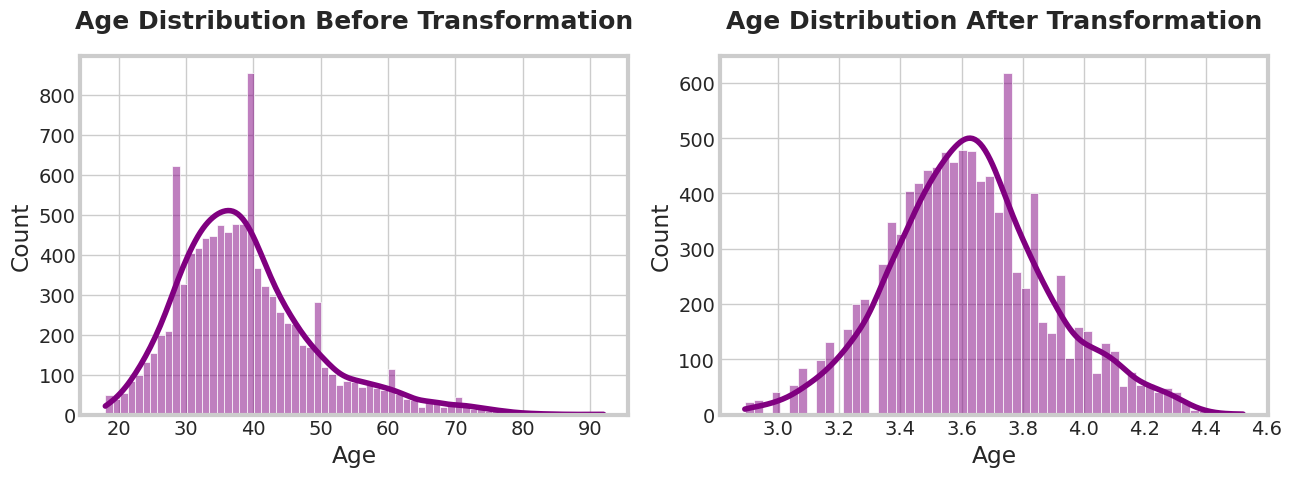

In [ ]:
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
sns.histplot(old_age, color="purple", kde=True)
plt.title("Age Distribution Before Transformation",fontweight="black",size=18,pad=20)

plt.subplot(1,2,2)
sns.histplot(df["Age"], color="purple", kde=True)
plt.title("Age Distribution After Transformation",fontweight="black",size=18,pad=20)
plt.tight_layout()
plt.show()

In [ ]:
X = df.drop(columns=["Churned"])
y = df["Churned"]

In [ ]:
y.head(20)

0     1
1     0
2     1
3     0
4     0
5     1
6     0
7     1
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    1
17    0
18    0
19    0
Name: Churned, dtype: int64

In [ ]:
y.unique()

array([1, 0])

In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0,shuffle=True)

In [ ]:
print("Shape of X_train is:",X_train.shape)
print("Shape of X_test is: ",X_test.shape)
print("Shape of y_train is:",y_train.shape)
print("Shape of y_test is: ",y_test.shape)

Shape of X_train is: (7000, 16)
Shape of X_test is:  (3000, 16)
Shape of y_train is: (7000,)
Shape of y_test is:  (3000,)


In [ ]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=42)

In [ ]:
# Aplicando SMOTE para el ajuste del conjunto de datos
X_train, y_train = smt.fit_resample(X_train, y_train)

In [ ]:
print(X_train.shape, y_train.shape)

(11168, 16) (11168,)


In [ ]:
y_train.value_counts().to_frame()


,Churned
1,5584
0,5584


In [ ]:
X_train

,CreditScore,Age,Tenure,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Total_Products_More Than 2 Products,Total_Products_One product,Total_Products_Two Products,Account_Balance_More Than zero Balance,Account_Balance_Zero Balance
0,641,3.496508,2,1,1,55796.830000,1,0,0,0,1,0,0,1,1,0
1,541,3.663562,7,1,0,19823.020000,1,0,0,0,1,0,0,1,0,1
2,590,4.330733,5,0,1,13848.580000,1,0,0,1,0,0,1,0,1,0
3,516,3.912023,5,0,1,146145.930000,0,0,1,0,1,0,1,0,0,1
4,508,4.094345,7,1,1,129562.740000,1,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11163,520,3.685966,1,0,0,109652.162610,1,0,0,0,0,0,1,0,1,0
11164,572,3.779369,2,1,0,143452.304903,1,0,0,0,0,0,1,0,0,0
11165,616,3.939304,7,0,0,38917.082716,1,0,0,0,0,0,1,0,1,0
11166,625,3.949051,3,0,0,165591.319867,0,1,0,0,0,0,0,0,1,0


##**Logistic Regression : Binary Outcome**

In [ ]:
from sklearn.linear_model import LogisticRegression

# Create a logistic regression classifier object
lm = LogisticRegression(random_state=0)

# Fit the model on the train set
lm.fit(X_train, y_train)

# Perform prediction on the test set
y_pred_lm = lm.predict(X_test)

# Calculate the accuracy of the model
score_test_lm= lm.score(X_test, y_test)
score_train_lm= lm.score(X_train, y_train)

print("Accuracy Train_lm:", score_train_lm)
print("Accuracy Test_lm:", score_test_lm)
print("Predictions_lm:", y_pred_lm)

Accuracy Train_lm: 0.5165651862464183
Accuracy Test_lm: 0.5343333333333333
Predictions_lm: [1 1 0 ... 1 0 0]


In [ ]:
# building the model and fitting the data
import statsmodels.api as sm

log_reg = sm.Logit(y_train, X_train).fit()


Optimization terminated successfully.
         Current function value: 0.252011
         Iterations 10


In [ ]:
# printing the summary table

print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:                Churned   No. Observations:                11168
Model:                          Logit   Df Residuals:                    11152
Method:                           MLE   Df Model:                           15
Date:                Wed, 03 Apr 2024   Pseudo R-squ.:                  0.6364
Time:                        00:44:27   Log-Likelihood:                -2814.5
converged:                       True   LL-Null:                       -7741.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
CreditScore                               -0.0002      0.000     -0.626      0.531      -0.001       0.000
Age                                        4.00

In [ ]:
print(log_reg.summary2())

                                    Results: Logit
Model:                       Logit                   Method:                  MLE      
Dependent Variable:          Churned                 Pseudo R-squared:        0.636    
Date:                        2024-04-03 00:44        AIC:                     5660.9106
No. Observations:            11168                   BIC:                     5778.0435
Df Model:                    15                      Log-Likelihood:          -2814.5  
Df Residuals:                11152                   LL-Null:                 -7741.1  
Converged:                   1.0000                  LLR p-value:             0.0000   
No. Iterations:              10.0000                 Scale:                   1.0000   
---------------------------------------------------------------------------------------
                                        Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score



# Calculate the confusion matrix
cm_lm = confusion_matrix(y_test, y_pred_lm)

# Calculate the precision, recall, and accuracy

precision_lm = precision_score(y_test, y_pred_lm, average='macro')
recall_lm = recall_score(y_test, y_pred_lm, average='macro')
accuracy_lm = accuracy_score(y_test, y_pred_lm)

# Print the confusion matrix, precision, recall, and accuracy
print('Confusion Matrix_lm:\n', cm_lm)
print('Precision_lm:', precision_lm)
print('Recall_lm:', recall_lm)
print('Accuracy_lm:', accuracy_lm)

Confusion Matrix_lm:
 [[1320 1059]
 [ 338  283]]
Precision_lm: 0.5035096061367097
Recall_lm: 0.505285783617929
Accuracy_lm: 0.5343333333333333


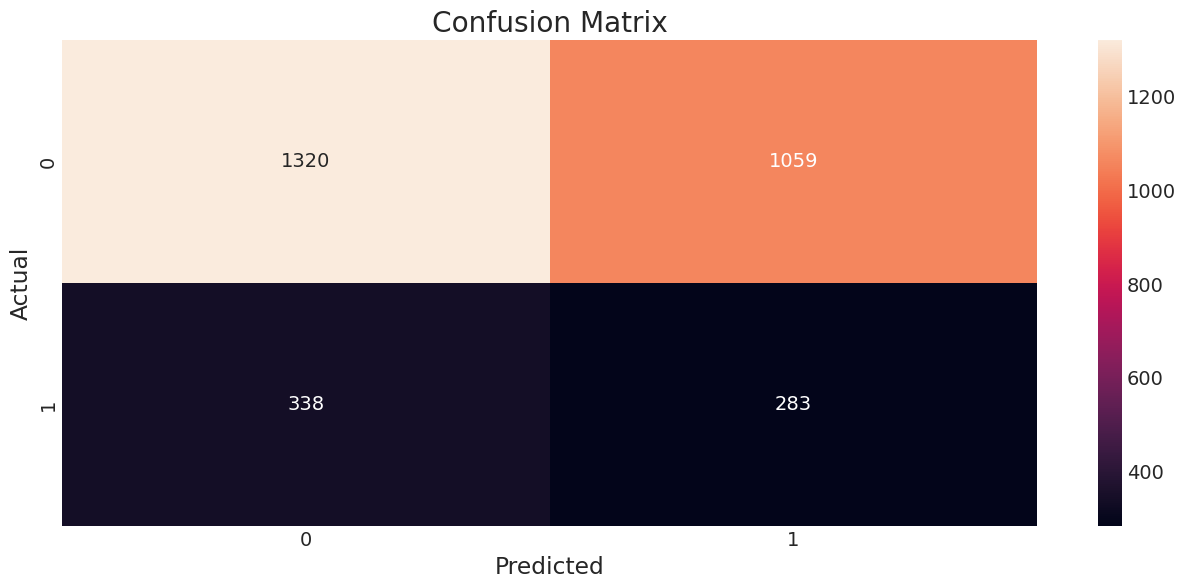

In [ ]:
# Visualize confusion matrix using seaborn
sns.heatmap(cm_lm, annot=True, fmt='d')  # fmt='d' for integer formatting
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
y_pred_lm_df = pd.DataFrame(y_pred_lm, columns=['LM_Pred'])
y_pred_lm_df

,LM_Pred
0,1
1,1
2,0
3,0
4,1
...,...
2995,1
2996,0
2997,1
2998,0


In [ ]:
y_test

9394    0
898     1
2398    0
5906    0
2343    0
       ..
4004    0
7375    0
9307    0
8394    0
5233    1
Name: Churned, Length: 3000, dtype: int64

In [ ]:
import pandas as pd

# Crear un DataFrame con una columna 'Orig' y el índice del 1 al 3000
y_test_df = pd.DataFrame({'Orig': y_test.values}, index=range(1, len(y_test) + 1))

print(y_test_df)


      Orig
1        0
2        1
3        0
4        0
5        0
...    ...
2996     0
2997     0
2998     0
2999     0
3000     1

[3000 rows x 1 columns]


In [ ]:
y_test_df['LM_Pred'] = y_pred_lm_df
y_test_df.head(20)


,Orig,LM_Pred
1,0,1.0
2,1,0.0
3,0,0.0
4,0,1.0
5,0,0.0
6,1,1.0
7,0,0.0
8,0,0.0
9,1,1.0
10,1,0.0


In [ ]:
# Get the odds ratio

import numpy as np
odds_ratio_lm = np.exp(lm.coef_)

print("Odds Ratio:", odds_ratio_lm)


Odds Ratio: [[0.99982348 1.00000109 0.99999484 0.99999838 0.99999683 1.00000103
  0.9999971  1.00000004 0.99999847 0.99999946 0.99999706 1.00000037
  1.00000061 0.99999574 1.0000001  0.99999741]]


In [ ]:
# Create a pandas dataframe with the variable names and the odds ratio
df_lm = pd.DataFrame({'Variable': ['CreditScore', 'Age', 'Tenure', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geography_France',
                  'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male', 'Total_Products_More Than 2 Products',
                  'Total_Products_One product', 'Total_Products_Two Products', 'Account_Balance_More Than zero Balance',
                  'Account_Balance_Zero Balance'], 'Odds Ratio': odds_ratio_lm[0]})

df_lm

,Variable,Odds Ratio
0,CreditScore,0.999823
1,Age,1.000001
2,Tenure,0.999995
3,HasCrCard,0.999998
4,IsActiveMember,0.999997
5,EstimatedSalary,1.000001
6,Geography_France,0.999997
7,Geography_Germany,1.000000
8,Geography_Spain,0.999998
9,Gender_Female,0.999999


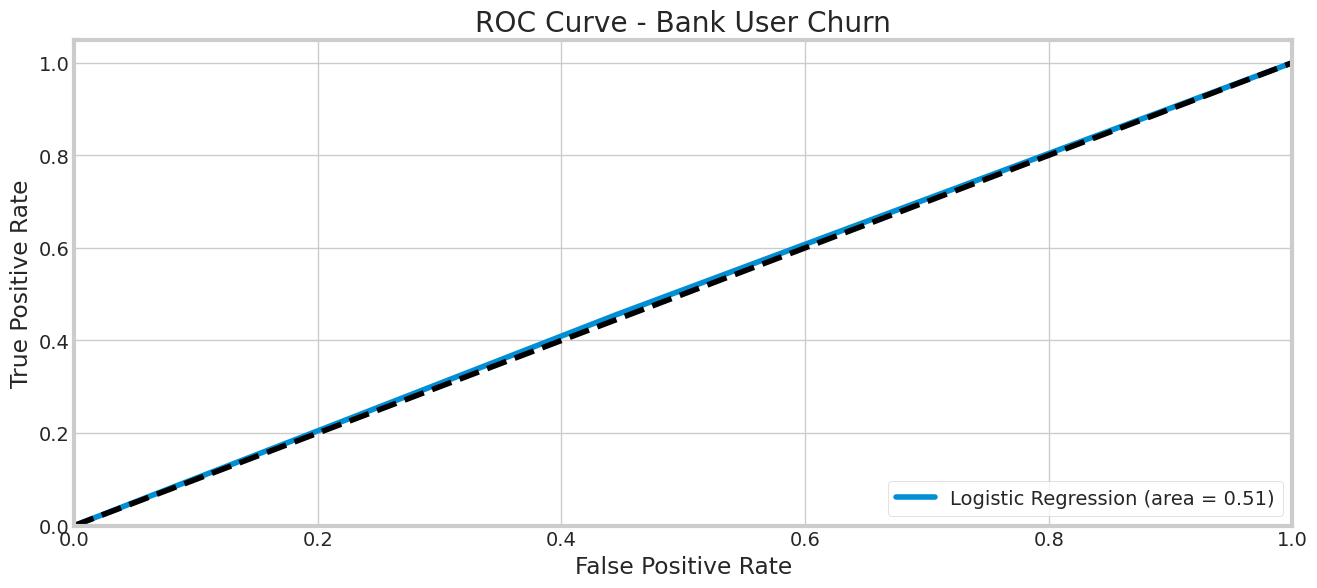

In [ ]:
####################################
# ROC Curve Construction
####################################

# compute TPR = True Positive Rate and FPR=False Positive Rate for various thresholds

from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred_lm)

# compute AUC
roc_auc = auc(fpr, tpr)

# plot ROC curve
plt.figure()
plt.plot(fpr, tpr,label='Logistic Regression (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--') # diagonal line for reference
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Bank User Churn')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

auc_lm = roc_auc_score(y_test, y_pred_lm)
auc_lm

0.5052857836179291

###**Interpretations - Odds Ratio**

**CreditScore:** Despite the small negative coefficient, the odds ratio of 0.999823 suggests that an increase in credit score slightly decreases the odds of churn. However, this effect is very small and may not be significant in practice

**Age:** The significant positive coefficient and odds ratio of 1.000001 indicate that aging of customers slightly increases the odds of churn. This suggests that older customers may be more likely to leave the service.

**Total_Products:** The number of products a customer has seems to have an impact on the odds of churn. Customers with more than 2 products are less likely to churn compared to those with fewer products.

**IsActiveMember:** Active members have a significant impact in reducing the odds of churn, as indicated by the odds ratio of 0.999997. This suggests that strategies to encourage member activity could be effective in retaining customers.

###**Interpretations - Confusion Matrix & ROC Curve**



*   The model correctly identified 283 churn cases and 1320 non-churn cases, but misclassified 1059 non-churn cases as churn and 338 churn cases as non-churn.

*   Precision is around 50.35%, indicating how many predicted churn cases were correct, while Recall is approximately 50.53%, indicating how many actual churn cases were correctly identified.

*   The model's overall accuracy is 53.43%.

*   The ROC curve AUC value of 0.51 suggests poor performance in distinguishing between churn and non-churn cases.





#**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

In [ ]:
param_grid = {"max_depth":[3,4,5,6,7,8,9,10],
              "min_samples_split":[2,3,4,5,6,7,8],
              "min_samples_leaf":[1,2,3,4,5,6,7,8],
              "criterion":["gini","entropy"],
              "splitter":["best","random"],
              "max_features":["auto",None],
              "random_state":[0,42]}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(dtree, param_grid, cv=5, n_jobs=-1)

grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', None],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8],
                         'random_state': [0, 42],
                         'splitter': ['best', 'random']})

In [ ]:
print("Best Parameters for DecisionTree Model is:\n\n")
print(grid_search.best_params_)


Best Parameters for DecisionTree Model is:


{'criterion': 'gini', 'max_depth': 8, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'random_state': 42, 'splitter': 'random'}


In [ ]:
best_params = grid_search.best_params_

# Create a DecisionTreeClassifier object with the best parameters
dtree = DecisionTreeClassifier(**best_params)

# Fit the model with the best parameters
dtree.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=8, min_samples_leaf=4, random_state=42,
                       splitter='random')

In [ ]:
# now make prediction on the y_test population, using X_test

y_test_pred = dtree.predict(X_test)

# now make prediction (i.e., get fitted values) on the y_train population, using X_train

y_fitted = dtree.predict(X_train)

In [ ]:
# Measure Accuracy on the train population using accuracy_score() function :

accuracy_train = accuracy_score(y_train,y_fitted)

print("Accuracy_train:", accuracy_train)

Accuracy_train: 0.8883416905444126


In [ ]:
# Calculate the accuracy of the model using accuracy_score() function

accuracy_test = accuracy_score(y_test, y_test_pred)

print("Accuracy_Test:", accuracy_test)

Accuracy_Test: 0.8283333333333334


In [ ]:
imp_df = pd.DataFrame({"Feature Name":X_train.columns,
                       "Importance":dtree.feature_importances_})

<ipython-input-90-eeb10b208da5>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature Name", data=features, palette="pastel")


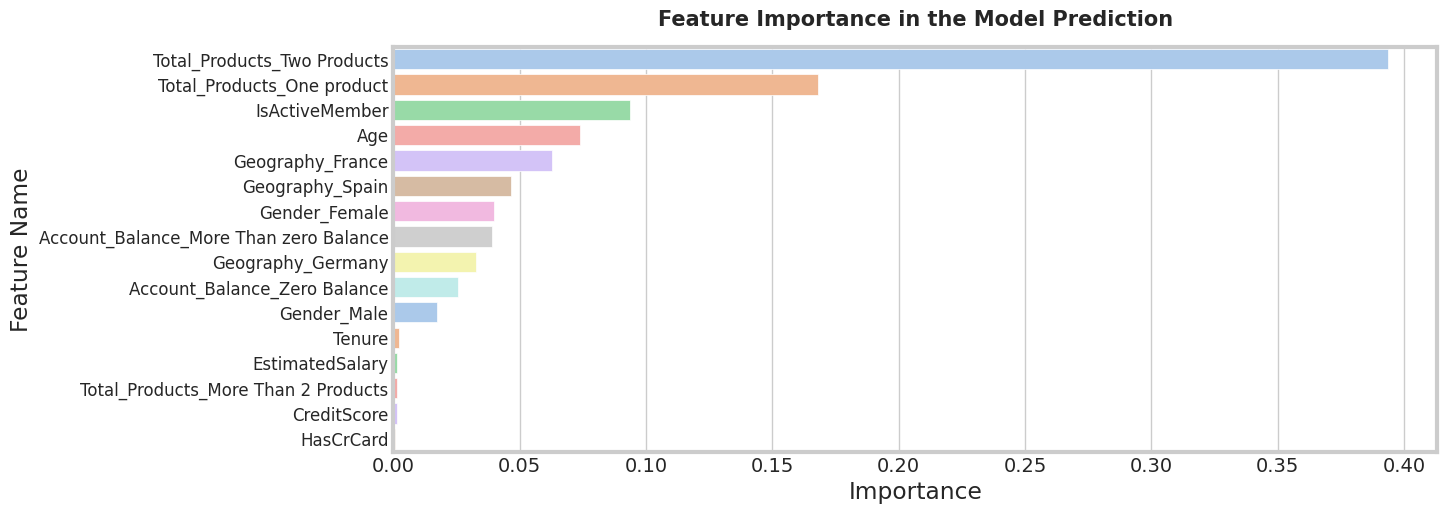

In [ ]:
features = imp_df.sort_values(by="Importance",ascending=False)

plt.figure(figsize=(12,5))
sns.barplot(x="Importance", y="Feature Name", data=features, palette="pastel")
plt.title("Feature Importance in the Model Prediction", fontweight="black", size=15, pad=15)
plt.yticks(size=12)
plt.show()

In [ ]:
X_test

,CreditScore,Age,Tenure,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Total_Products_More Than 2 Products,Total_Products_One product,Total_Products_Two Products,Account_Balance_More Than zero Balance,Account_Balance_Zero Balance
9394,597,3.555348,8,1,1,192852.67,0,1,0,1,0,0,1,0,1,0
898,523,3.688879,2,1,0,128702.10,1,0,0,1,0,0,1,0,1,0
2398,706,3.737670,8,1,1,75732.25,0,0,1,1,0,0,1,0,1,0
5906,788,3.465736,4,0,0,89368.59,1,0,0,0,1,0,1,0,1,0
2343,706,3.637586,5,1,1,135662.17,0,1,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4004,530,3.713572,4,0,1,147606.71,0,0,1,1,0,0,0,1,0,1
7375,639,4.343805,6,1,1,55829.25,1,0,0,0,1,0,0,1,1,0
9307,685,3.688879,2,1,1,167400.29,1,0,0,0,1,0,0,1,1,0
8394,692,4.234107,10,1,1,70849.47,1,0,0,0,1,0,1,0,1,0


###**Interpretations**

*   **The key factors** that significantly influence the deactivation of customers banking facilities are: Total_Products, Age, IsActiveMember, Geography, Balance and Gender.

*   **The minimal impact** of features on the deactivation of customers' banking facilities are: CreditScore, HasCrCard, Tenure and EstimatedSalary


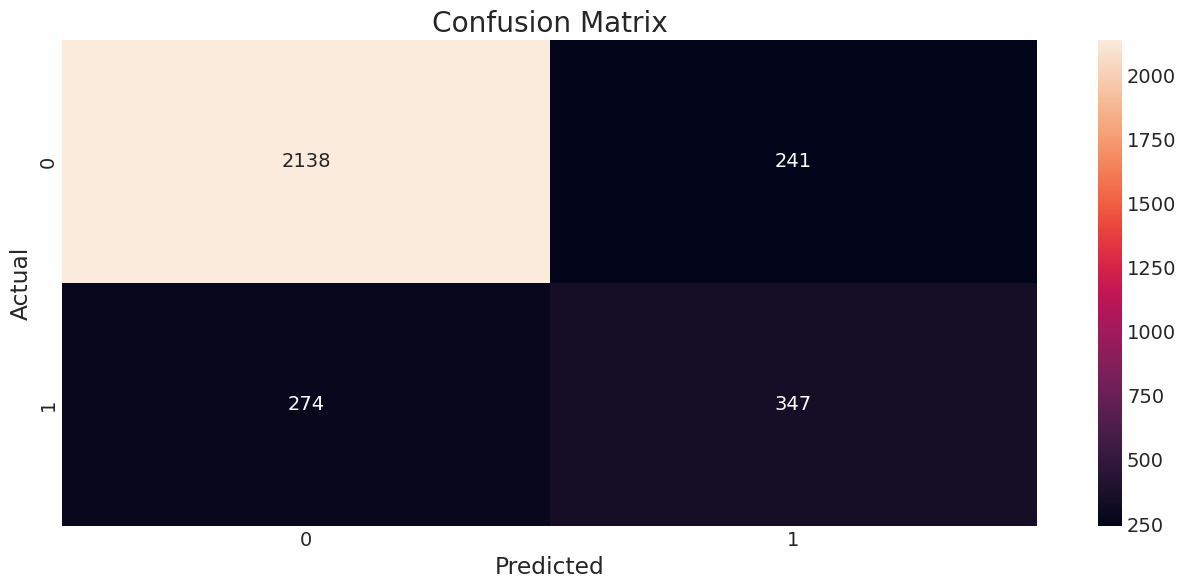

In [ ]:
cm = confusion_matrix(y_test,y_test_pred)

# Visualize confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt='d')  # fmt='d' for integer formatting
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

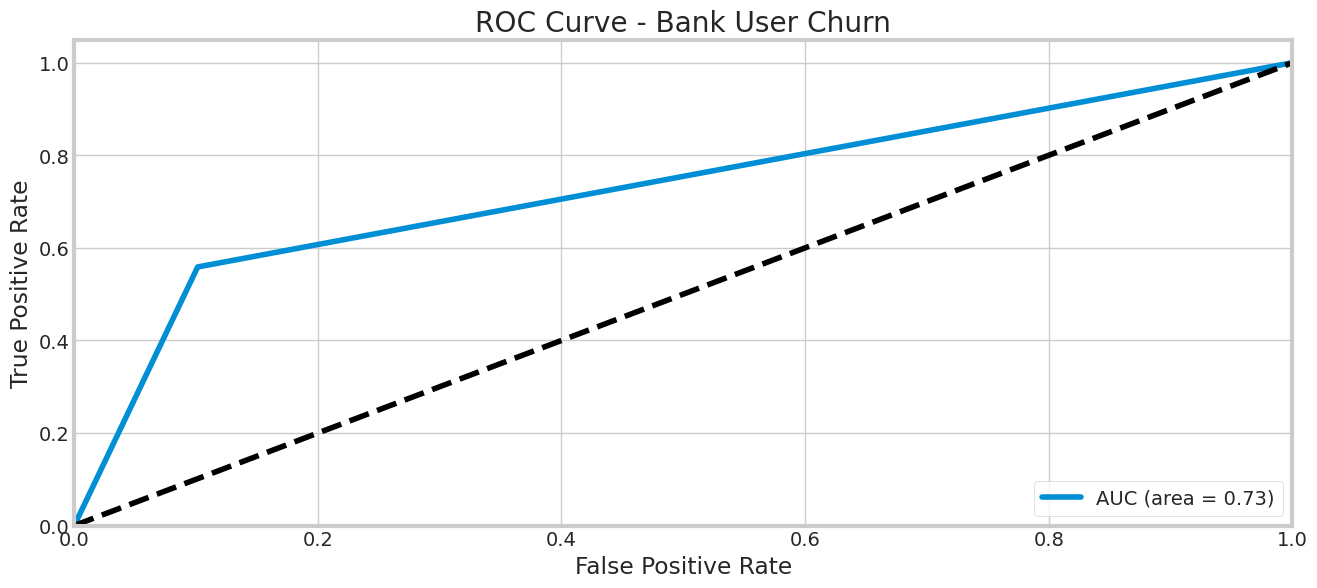

In [ ]:
####################################
# ROC Curve Construction
####################################

# compute TPR = True Positive Rate and FPR=False Positive Rate for various thresholds

from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)

# compute AUC
roc_auc = auc(fpr, tpr)

# plot ROC curve
plt.figure()
plt.plot(fpr, tpr,label='AUC (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--') # diagonal line for reference
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Bank User Churn')
plt.legend(loc="lower right")
plt.show()

###**Interpretations - Confusion Matrix & ROC Curve**

*  The model successfully identified positive cases with a high number of true positives, demonstrating its accuracy in classification.

*   However, notable false negatives suggest the model may have missed some actual positive instances, indicating room for improvement and further refinement.

*   The ROC curve AUC value of 0.73 indicates moderate performance in distinguishing between deactivated and non-deactivated cases. While not excellent, it suggests that the model has some ability to discriminate between the two classes (Churn and Not Churn).






In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

auc_dt = roc_auc_score(y_test, y_test_pred)
auc_dt

0.7287365494778182

In [ ]:
y_test_pred_df = pd.DataFrame(y_test_pred, columns=['DT_Pred'])
y_test_pred_df

,DT_Pred
0,0
1,0
2,0
3,0
4,0
...,...
2995,0
2996,0
2997,0
2998,0


In [ ]:
y_test_df['DT_Pred']= y_test_pred_df

In [ ]:
y_test_df.head(20)

,Orig,LM_Pred,DT_Pred
1,0,1.0,0.0
2,1,0.0,0.0
3,0,0.0,0.0
4,0,1.0,0.0
5,0,0.0,0.0
6,1,1.0,0.0
7,0,0.0,0.0
8,0,0.0,1.0
9,1,1.0,0.0
10,1,0.0,0.0


#**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()


In [ ]:
param_grid = {"max_depth":[3,4,5,6,7,8],
              "min_samples_split":[3,4,5,6,7,8],
              "min_samples_leaf":[3,4,5,6,7,8],
              "n_estimators": [50,70,90,100],
              "criterion":["gini","entropy"]}

In [ ]:
grid_search = GridSearchCV(rfc, param_grid, cv=5, n_jobs=-1)

grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [3, 4, 5, 6, 7, 8],
                         'min_samples_split': [3, 4, 5, 6, 7, 8],
                         'n_estimators': [50, 70, 90, 100]})

In [ ]:
best_parameters = grid_search.best_params_

print("Best Parameters for RandomForest Model is:\n\n")
best_parameters

Best Parameters for RandomForest Model is:




{'criterion': 'entropy',
 'max_depth': 8,
 'min_samples_leaf': 3,
 'min_samples_split': 5,
 'n_estimators': 100}

In [ ]:
rfc = RandomForestClassifier(**best_parameters)
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=8, min_samples_leaf=3,
                       min_samples_split=5)

In [ ]:
# Evaluate the model
print('Accuracy_rfc:', rfc.score(X_test, y_test))

# Predict the labels of the test set
y_pred_rfc = rfc.predict(X_test)

# Calculate the accuracy of the model
score_test_rfc = rfc.score(X_test, y_test)
score_train_rfc = rfc.score(X_train, y_train)

print("Accuracy Train_rfc:", score_train_rfc)
print("Accuracy Test_rfc:", score_test_rfc)
print("Predictions_rfc:", y_pred_rfc)

Accuracy_rfc: 0.8396666666666667
Accuracy Train_rfc: 0.9058022922636103
Accuracy Test_rfc: 0.8396666666666667
Predictions_rfc: [0 0 0 ... 0 0 1]


In [ ]:
imp_df = pd.DataFrame({"Feature Name":X_train.columns,
                       "Importance":rfc.feature_importances_})

<ipython-input-105-eeb10b208da5>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature Name", data=features, palette="pastel")


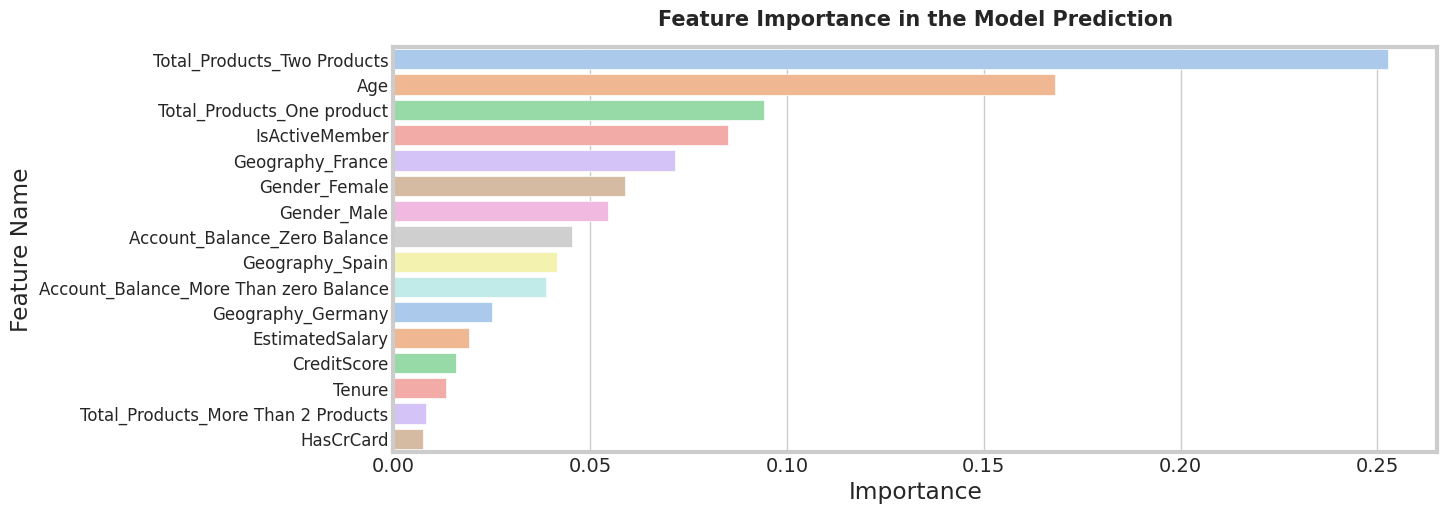

In [ ]:
features = imp_df.sort_values(by="Importance",ascending=False)

plt.figure(figsize=(12,5))
sns.barplot(x="Importance", y="Feature Name", data=features, palette="pastel")
plt.title("Feature Importance in the Model Prediction", fontweight="black", size=15, pad=15)
plt.yticks(size=12)
plt.show()

###**Interpretations**

*   **The key factors** that significantly influence the deactivation of customers banking facilities are: Total_Products, Age, IsActiveMember, Geography, Gender and Balance.

*   **The minimal impact** of features on the deactivation of customers' banking facilities are: HasCrCard, Tenure, CreditScore and EstimatedSalary

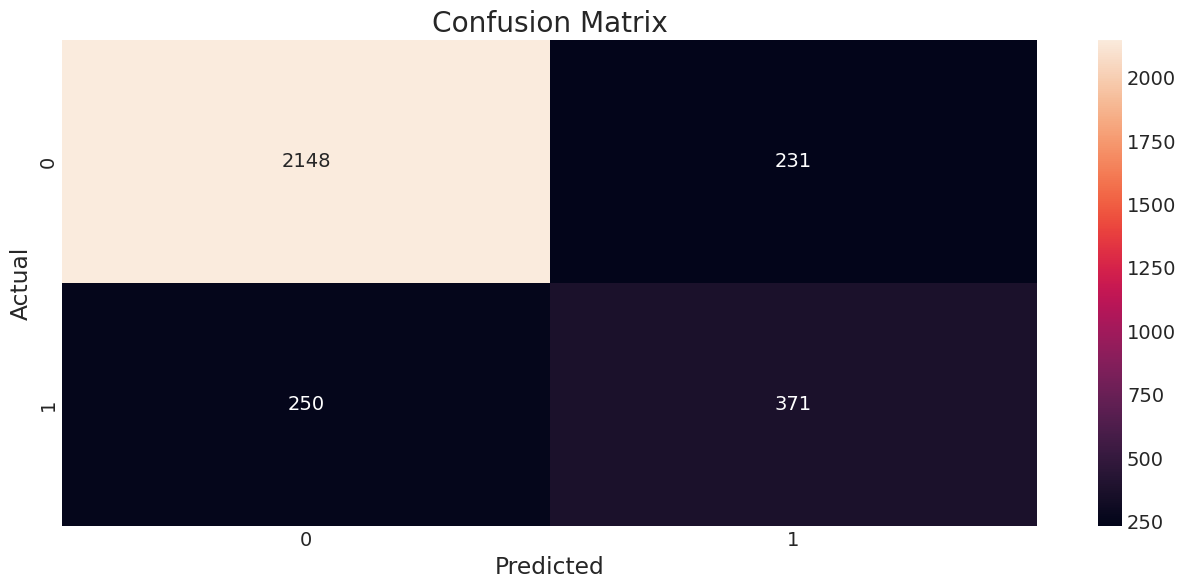

In [ ]:
cm = confusion_matrix(y_test,y_pred_rfc)

# Visualize confusion matrix using seaborn
sns.heatmap(cm, annot=True, fmt='d')  # fmt='d' for integer formatting
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
y_pred_rfc_df = pd.DataFrame(y_pred_rfc,columns=['RF_Pred'])

In [ ]:
y_test_df['RF_Pred']= y_pred_rfc_df
y_test_df.head(20)

,Orig,LM_Pred,DT_Pred,RF_Pred
1,0,1.0,0.0,0.0
2,1,0.0,0.0,0.0
3,0,0.0,0.0,0.0
4,0,1.0,0.0,0.0
5,0,0.0,0.0,1.0
6,1,1.0,0.0,0.0
7,0,0.0,0.0,0.0
8,0,0.0,1.0,0.0
9,1,1.0,0.0,0.0
10,1,0.0,0.0,0.0


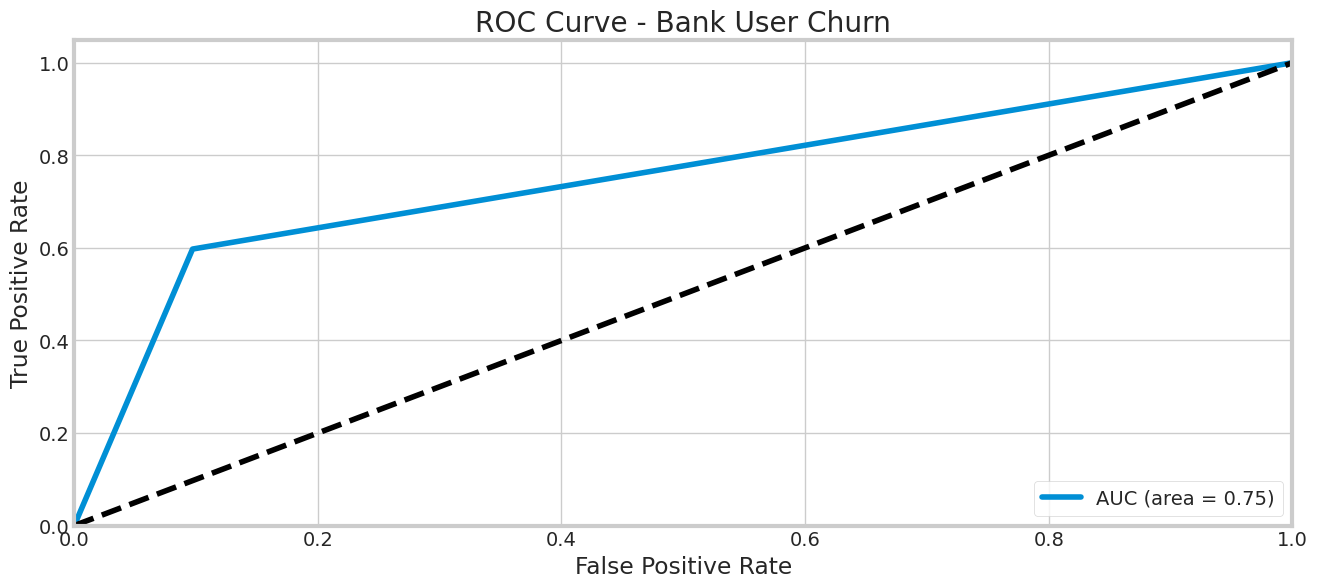

In [ ]:
####################################
# ROC Curve Construction
####################################

# compute TPR = True Positive Rate and FPR=False Positive Rate for various thresholds

from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred_rfc)

# compute AUC
roc_auc = auc(fpr, tpr)

# plot ROC curve
plt.figure()
plt.plot(fpr, tpr,label='AUC (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--') # diagonal line for reference
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Bank User Churn')
plt.legend(loc="lower right")
plt.show()

###**Interpretations - Confusion Matrix & ROC Curve**

*  The model effectively identifies positive instances with a significant number of true positive forecasts, demonstrating its ability to classify the desired outcome accurately.

*   However, the presence of a relatively high number of false negatives suggests the model may have missed some genuine positive instances, highlighting the need for further refinement to improve its accuracy in detecting all positive cases.

*   The ROC Curve value of 0.75 indicates the model's strong ability to distinguish between positive and negative instances, showcasing its proficiency in making precise predictions regarding churn and non-churn scenarios.

#**Summary**

In [ ]:
print("*******************************************")
print("********* Accuracy during Training ********")
print("*******************************************")
print("                                           ")
print("Accuracy Train_lm.   :", score_train_lm)
print("Accuracy Train_dt.   :", accuracy_train)
print("Accuracy Train_rfc.  :", score_train_rfc)

print("                                           ")
print("*******************************************")
print("********* Accuracy during Testing ********")
print("*******************************************")
print("                                           ")
print("Accuracy Test_lm.    :", score_test_lm)
print("Accuracy Test_dt.   :", accuracy_test)
print("Accuracy Test_rfc.  :", score_test_rfc)


*******************************************
********* Accuracy during Training ********
*******************************************
                                           
Accuracy Train_lm.   : 0.5165651862464183
Accuracy Train_dt.   : 0.8883416905444126
Accuracy Train_rfc.  : 0.9058022922636103
                                           
*******************************************
********* Accuracy during Testing ********
*******************************************
                                           
Accuracy Test_lm.    : 0.5343333333333333
Accuracy Test_dt.   : 0.8283333333333334
Accuracy Test_rfc.  : 0.8396666666666667


In [ ]:
y_test_df['Avg_Pred'] = y_test_df.mean(axis=1) #axis = 1 means all the columns, and axis=0 means all the rows
y_test_df.head(20)

,Orig,LM_Pred,DT_Pred,RF_Pred,Avg_Pred
1,0,1.0,0.0,0.0,0.25
2,1,0.0,0.0,0.0,0.25
3,0,0.0,0.0,0.0,0.00
4,0,1.0,0.0,0.0,0.25
5,0,0.0,0.0,1.0,0.25
6,1,1.0,0.0,0.0,0.50
7,0,0.0,0.0,0.0,0.00
8,0,0.0,1.0,0.0,0.25
9,1,1.0,0.0,0.0,0.50
10,1,0.0,0.0,0.0,0.25


In [ ]:
# Convert the Avg. Pred to Binary

y_test_df['Avg_Pred_Binary'] = np.where(y_test_df['Avg_Pred'] >= 0.5, 1, 0)
y_test_df.head(20)

,Orig,LM_Pred,DT_Pred,RF_Pred,Avg_Pred,Avg_Pred_Binary
1,0,1.0,0.0,0.0,0.25,0
2,1,0.0,0.0,0.0,0.25,0
3,0,0.0,0.0,0.0,0.00,0
4,0,1.0,0.0,0.0,0.25,0
5,0,0.0,0.0,1.0,0.25,0
6,1,1.0,0.0,0.0,0.50,1
7,0,0.0,0.0,0.0,0.00,0
8,0,0.0,1.0,0.0,0.25,0
9,1,1.0,0.0,0.0,0.50,1
10,1,0.0,0.0,0.0,0.25,0


###**Interpretations**

*   The logistic regression model shows the lowest performance, with relatively low accuracies on both training and testing sets.

*   The decision tree and random forest models outperform the logistic regression model, with significantly higher accuracies on both training and testing sets.

*   Among the tree-based models, the random forest model achieves the highest accuracy on both training and testing sets, indicating its robustness and generalization ability.

*   All models perform better on the training set compared to the testing set, suggesting a degree of overfitting, especially notable in the decision tree model.





#Conclusions and Recommendations

###**Conclusions**

*   The key factors that significantly influence the deactivation of customers banking facilities are Total_Products, Age, IsActiveMember, Geography, Balance and Gender.

*   The decision tree and random forest models achieved high accuracy scores, with training accuracies around 88% to 91% and testing accuracies ranging from 83% to 84%. This indicates a good fit to the training data and the ability to generalize well to unseen instances.

*   The AUC values for the models range from 0.71 to 0.75, indicating a moderate discriminatory power. While not extremely high, these values suggest that the models are reasonably effective in distinguishing between positive and negative instances.

*   The decision tree and random forest models demonstrate strong performance across multiple evaluation metrics, indicating their effectiveness in making accurate predictions and capturing the desired outcomes.





###**Recommendations**

*   Incentivize customers to have multiple banking products, as indicated by the significance of Total_Products in influencing churn.

*   Implement customer engagement strategies such as rewards, incentives, and personalized communication to encourage active participation, especially among older customers (Age) and those with higher balances (Balance).

*   Tailor retention efforts based on geographical regions, considering the influence of Geography on churn behavior.





